In [2]:
import os
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import seaborn as sns

In [3]:
with open(r"C:\Users\juans\github\juan_analysis\20201210\intermediates\unit_times_dataframe.pkl", 'rb') as z:
    units_df = pkl.load(z)
       
with open(r"C:\Users\juans\github\juan_analysis\20201210\intermediates\gratori_all_df.pkl", 'rb') as z:
    gratori_data = pkl.load(z)

In [4]:
gratori_data.head()

,frame_no,contrast,posY,TF,SF,phase,posX,ori,times
0,7,1,0,2,0.08,0,0,240,770.30797
1,17,1,0,2,0.16,0,0,210,773.30777
2,0,1,0,2,0.08,0,0,0,776.30574
3,14,1,0,2,0.16,0,0,90,779.30740
4,16,1,0,2,0.16,0,0,180,782.30727


In [5]:
imec0_units = units_df.loc[units_df['probe']=='imec0']
imec0_units.reset_index(inplace = True, drop = True)

imec1_units = units_df.loc[units_df['probe']=='imec1']
imec1_units.reset_index(inplace = True, drop = True)

In [5]:
def psth_line(times,triggers,pre=0.5,timeDomain=True,post=1,binsize=0.05,ymax=75,yoffset=0,output='fig',name='',color='#00cc00',linewidth=0.5,axes=None,labels=True,sparse=False,labelsize=18,axis_labelsize=20,error='shaded',alpha=0.5,**kwargs):
    post = post + 1
    peris=[]#np.zeros(len(triggers),len(times))
    p=[]
    if timeDomain:
        samplingRate = 1.0
    else:
        samplingRate = samplingRate
        
    times = np.array(times).astype(float) / samplingRate
    triggers = np.array(triggers).astype(float) / samplingRate

    numbins = int((post+pre) / binsize) 
    bytrial = np.zeros((len(triggers),numbins))
    for i,t in enumerate(triggers):
        
        if len(np.where(times >= t - pre)[0]) > 0 and len(np.where(times >= t + post)[0]) > 0:
            start = np.where(times >= t - pre)[0][0]
            end = np.where(times >= t + post)[0][0]
            for trial_spike in times[start:end-1]:
                if float(trial_spike-t)/float(binsize) < float(numbins):
                    bytrial[i][int((trial_spike-t)/binsize-1)] +=1   
        else:
        	 pass
             #bytrial[i][:]=0
        #print 'start: ' + str(start)+'   end: ' + str(end)

    variance = np.std(bytrial,axis=0)/binsize/np.sqrt((len(triggers)))
    hist = np.mean(bytrial,axis=0)/binsize
    edges = np.linspace(-pre+binsize,post+binsize,numbins)
    return variance,hist,edges

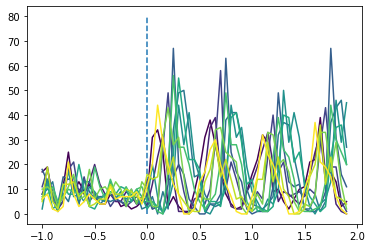

In [103]:
data1 = imec0_units; data = pd.DataFrame(data1.reset_index(drop = True))
stim_data = gratori_data; condition='ori'
unit = 42; times = np.array(data.times[unit])
pre = 1; post=2; binsize=0.05
numbins = int((post+pre) / binsize)
x = np.arange(-pre,post,binsize)
colors = plt.cm.viridis(np.linspace(0,1,11))

fig,ax = plt.subplots()

for i,cond in enumerate(np.unique(stim_data[condition])):
    triggers = np.array(stim_data['times'][stim_data[condition] == cond])
    bytrial = np.zeros((len(triggers),numbins-1))
    for j, trigger in enumerate(triggers):
        trial = triggers[j]
        start = trial-pre
        end = trial+post
        bins_ = np.arange(start,end,binsize)
        trial_spikes = times[np.logical_and(times>=start, times<=end)]
        hist,edges = np.histogram(trial_spikes,bins=bins_)
        if len(hist)==59:
            bytrial[j]=hist
    psth = np.mean(bytrial,axis=0)/binsize
    ax.plot(x[:-1],psth, color=colors[i])
plt.vlines(x=0,linestyles='dashed',ymin=0,ymax=80)

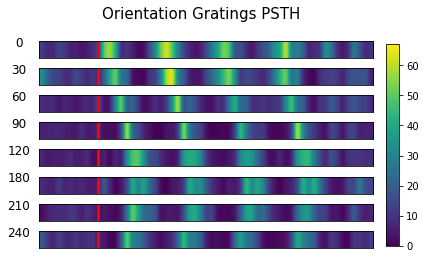

In [165]:
data1 = imec0_units; data = pd.DataFrame(data1.reset_index(drop = True))
stim_data = gratori_data; condition='ori'
unit = 42; times = np.array(data.times[unit])
pre = 0.5; post=2.5; binsize=0.05
numbins = int((post+pre) / binsize)
x = np.round(np.arange(-pre,post,binsize).astype(float),1)

fig,ax = plt.subplots(8,1)
psth_all = []

for i,cond in enumerate(np.unique(stim_data[condition])[:8]):
    triggers = np.array(stim_data['times'][stim_data[condition] == cond])
    bytrial = np.zeros((len(triggers),numbins-1))
    for j, trigger in enumerate(triggers):
        trial = triggers[j]
        start = trial-pre
        end = trial+post
        bins_ = np.arange(start,end,binsize)
        trial_spikes = times[np.logical_and(times>=start, times<=end)]
        hist,edges = np.histogram(trial_spikes,bins=bins_)
        if len(hist)==59:
            bytrial[j]=hist
    psth = np.mean(bytrial,axis=0)/binsize
    psth = np.reshape(psth,(1,len(psth)))
    psth_all.append(psth)
    im = ax[i].imshow(psth,aspect=3, vmin=0,vmax=np.max(psth_all),interpolation='gaussian')
    ax[i].set_ylabel(str(cond),rotation=0,labelpad=20,fontsize=12)
    ax[i].set_yticks([])
    ax[i].axvline(pre/binsize,color='r',linewidth=3)
    #if i == len(np.unique(stim_data[condition])[:8])-1:
        #ax[i].set_xticks([0,pre/binsize+binsize,(pre+post)/binsize+binsize])
        #ax[i].set_xticklabels([-pre,0,post])
    #else:
        #ax[i].set_xticks([])
    ax[i].set_xticks([])
#fig.tight_layout()
fig.subplots_adjust(hspace=0,wspace=0)
cbar_ax = fig.add_axes([0.93, 0.15, 0.03, 0.7])
fig.suptitle('Orientation Gratings PSTH', fontsize=15)
fig.colorbar(im,cax=cbar_ax )
#plt.vlines(x=0,linestyles='dashed',ymin=0,ymax=80)
plt.show()

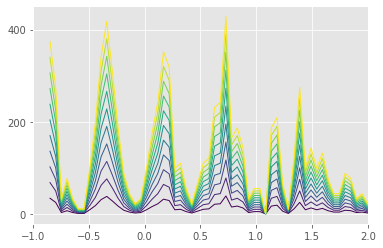

In [36]:
data1 = imec0_units
data = pd.DataFrame(data1.reset_index(drop = True))
stim_data = gratori_data; condition='ori'
triggers = np.array(stim_data.times[stim_data.ori==0]).astype(float)
times = np.array(data.times[42])
pre=1;post=2;binsize=0.05;output='fig';ymax=100;yoffset=0;linewidth=1.0;alpha=0.5
color_range=len(np.unique(stim_data[condition]))
colors = plt.cm.viridis(np.linspace(0,1,color_range))
color='#00cc00'

numbins=int((pre+post)/binsize)
bytrial = np.zeros((len(triggers),numbins))

for i,j in enumerate(np.unique(stim_data[condition])):
    for k, t in enumerate(triggers):
        if len(np.where(times >= t-pre)[0]) > 0 and len(np.where(times >= t + post)[0]) > 0:
            start = np.where(times >= t - pre)[0][0]
            end = np.where(times >= t + post)[0][0]
            for trial_spike in times[start:end]:
                if float(trial_spike-t)/float(binsize) < float(numbins): 
                    bytrial[k][int((trial_spike-t)/binsize)] +=1
                else:
                    pass

    variance = np.std(bytrial,axis=0)/binsize/np.sqrt((len(triggers)))
    hist = np.mean(bytrial,axis=0)/binsize
    edges = np.linspace(-pre+binsize,post+binsize,numbins)

    if output == 'fig':  
        plt.locator_params(axis='y',nbins=4)
        plt.plot(edges[2:-1],hist[2:-1]+yoffset,color=colors[i],linewidth=linewidth)
        #ax = plt.gca()
        #plt.spines['right'].set_visible(False)
        #ax.spines['top'].set_visible(False)
        #if 'shade_color' in kwargs.keys():
        #    shade_color=kwargs['shade_color']
        #else:
        shade_color=color    
        upper = hist+variance
        lower = hist-variance
        #plt.fill_between(edges[2:-1],upper[2:-1]+yoffset,hist[2:-1]+yoffset,alpha=alpha,color=colors[i],facecolor=colors[i])
        #plt.fill_between(edges[2:-1],hist[2:-1]+yoffset,lower[2:-1]+yoffset,alpha=alpha,color=colors[i],facecolor=colors[i])

        plt.xlim(-pre,post)
        #plt.ylim(0,ymax);

In [ ]:
def stacked_psth(unit,condition,threshold=True,times,triggers,pre=0.5,post=1,
                 binsize=0.05,ymax=75,yoffset=0,output='fig',name='',color='#00cc00',
                 linewidth=0.5,axes=None,
                 labels=True,sparse=False,labelsize=18,axis_labelsize=20,error='shaded',
                 alpha=0.5,**kwargs):

    for i,j in enumerate(np.unique(stim_data[condition])):
    triggers = np.array(stim_data['times'][stim_data[condition] == j])
    post = post + 1
    peris=[]#np.zeros(len(triggers),len(times))
    p=[]
        
    times = np.array(times).astype(float)
    triggers = np.array(triggers).astype(float)

    numbins = int((post+pre) / binsize) 
    bytrial = np.zeros((len(triggers),numbins))
    for i,t in enumerate(triggers):
        
        if len(np.where(times >= t - pre)[0]) > 0 and len(np.where(times >= t + post)[0]) > 0:
            start = np.where(times >= t - pre)[0][0]
            end = np.where(times >= t + post)[0][0]
            for trial_spike in times[start:end-1]:
                if float(trial_spike-t)/float(binsize) < float(numbins):
                    bytrial[i][int((trial_spike-t)/binsize-1)] +=1   
        else:
        	 pass
    variance = np.std(bytrial,axis=0)/binsize/np.sqrt((len(triggers)))
    hist = np.mean(bytrial,axis=0)/binsize
    edges = np.linspace(-pre+binsize,post+binsize,numbins)
    
        if threshold==True:
            pre_idx = np.where(edges<0)
            post_idx = np.logical_and(edges>0,edges<1.0)
            pre_bins = edges[pre_idx]
            post_bins = edges[post_idx]
            no_pre = len(pre_bins)
            no_post = len(post_bins)
            baseline_hist = hist[:no_pre]
            evoked_hist = hist[no_pre:no_post]
            baseline_mean = np.mean(baseline_hist)
            baseline_std = np.std(baseline_hist)
            thresh_cross.append(evoked_hist.any()>(baseline_mean+(baseline_std*3)))
        thresh_cross_unit.append(thresh_cross)
                              
    if output == 'fig':
        if error == 'shaded':
            if 'shade_color' in kwargs.keys():
                shade_color=kwargs['shade_color']
            else:
                shade_color=color    
            if axes == None:
                fig,axes=plt.subplots(1,1)
                #plt.figure()
                #axes=plt.gca()
            plt.locator_params(axis='y',nbins=4)
            upper = hist+variance
            lower = hist-variance
            axes.fill_between(edges[2:-1],upper[2:-1]+yoffset,hist[2:-1]+yoffset,alpha=alpha,color=shade_color,facecolor=shade_color)
            axes.fill_between(edges[2:-1],hist[2:-1]+yoffset,lower[2:-1]+yoffset,alpha=alpha,color=shade_color,facecolor=shade_color)
            axes.plot(edges[2:-1],hist[2:-1]+yoffset,color=color,linewidth=linewidth)
            axes.set_xlim(-pre,post-1)
            axes.set_ylim(0,ymax);
            if sparse:
                axes.set_xticklabels([])
                axes.set_yticklabels([])
            else:
                if labels:
                    axes.set_xlabel(r'$time \/ [s]$',fontsize=axis_labelsize)
                    axes.set_ylabel(r'$firing \/ rate \/ [Hz]$',fontsize=axis_labelsize)
                    axes.tick_params(axis='both',labelsize=labelsize)
            axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
            axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')   
            axes.set_title(name,y=0.5)
            return axes 
        else:
            if axes == None:
                fig,axes=plt.subplots(1,1)
                #plt.figure()
                #axes=plt.gca()
            f=axes.errorbar(edges,hist,yerr=variance,color=color)
            axes.set_xlim(-pre,post - 1)
            axes.set_ylim(0,ymax)
            if sparse:
                axes.set_xticklabels([])
                axes.set_yticklabels([])
            else:
                if labels:
                    axes.set_xlabel(r'$time \/ [s]$',fontsize=axis_labelsize)
                    axes.set_ylabel(r'$firing \/ rate \/ [Hz]$',fontsize=axis_labelsize)
                    axes.tick_params(axis='both',labelsize=labelsize)
            axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
            axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')   
            axes.set_title(name)
            return axes
    if output == 'hist':
        return (hist[:-1*int(1./binsize)],edges[:-1*int(1./binsize)])    
    if output == 'p':
        return (edges,hist,variance)

(-1, 2)

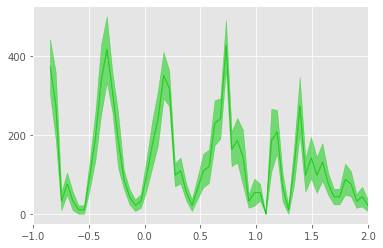

In [40]:
pre=1;post=2;ymax=75;yoffset=0;output='fig';name='';color='#00cc00';linewidth=0.5;axes=None;labels=True;
sparse=False;labelsize=18;axis_labelsize=20;error='shaded';alpha=0.5;shade_color=color

fig,axes = plt.subplots(1,1)
plt.locator_params(axis='y',nbins=4)
upper = hist+variance
lower = hist-variance
axes.fill_between(edges[2:-1],upper[2:-1]+yoffset,hist[2:-1]+yoffset,alpha=alpha,color=shade_color,facecolor=shade_color)
axes.fill_between(edges[2:-1],hist[2:-1]+yoffset,lower[2:-1]+yoffset,alpha=alpha,color=shade_color,facecolor=shade_color)
axes.plot(edges[2:-1],hist[2:-1]+yoffset,color=color,linewidth=linewidth)
axes.set_xlim(-pre,post)
#axes.set_ylim(0,ymax);

In [41]:
def psth_line(times,triggers,pre=0.5,timeDomain=True,post=1,binsize=0.05,ymax=75,yoffset=0,output='fig',name='',color='#00cc00',linewidth=0.5,axes=None,labels=True,sparse=False,labelsize=18,axis_labelsize=20,error='shaded',alpha=0.5,**kwargs):
    post = post + 1
    peris=[]#np.zeros(len(triggers),len(times))
    p=[]
    if timeDomain:
        samplingRate = 1.0
    else:
        samplingRate = samplingRate
        
    times = np.array(times).astype(float) / samplingRate + pre
    triggers = np.array(triggers).astype(float) / samplingRate

    numbins = int((post+pre) / binsize) 
    bytrial = np.zeros((len(triggers),numbins))
    for i,t in enumerate(triggers):
        
        if len(np.where(times >= t - pre)[0]) > 0 and len(np.where(times >= t + post)[0]) > 0:
            start = np.where(times >= t - pre)[0][0]
            end = np.where(times >= t + post)[0][0]
            for trial_spike in times[start:end-1]:
                if float(trial_spike-t)/float(binsize) < float(numbins):
                    bytrial[i][int((trial_spike-t)/binsize-1)] +=1   
        else:
        	 pass
             #bytrial[i][:]=0
        #print 'start: ' + str(start)+'   end: ' + str(end)

    variance = np.std(bytrial,axis=0)/binsize/np.sqrt((len(triggers)))
    hist = np.mean(bytrial,axis=0)/binsize
    edges = np.linspace(-pre+binsize,post+binsize,numbins)

    if output == 'fig':
        if error == 'shaded':
            if 'shade_color' in kwargs.keys():
                shade_color=kwargs['shade_color']
            else:
                shade_color=color    
            if axes == None:
                fig,axes=plt.subplots(1,1)
                #plt.figure()
                #axes=plt.gca()
            plt.locator_params(axis='y',nbins=4)
            upper = hist+variance
            lower = hist-variance
            axes.fill_between(edges[2:-1],upper[2:-1]+yoffset,hist[2:-1]+yoffset,alpha=alpha,color=shade_color,facecolor=shade_color)
            axes.fill_between(edges[2:-1],hist[2:-1]+yoffset,lower[2:-1]+yoffset,alpha=alpha,color=shade_color,facecolor=shade_color)
            axes.plot(edges[2:-1],hist[2:-1]+yoffset,color=color,linewidth=linewidth)
            axes.set_xlim(-pre,post-1)
            axes.set_ylim(0,ymax);
            if sparse:
                axes.set_xticklabels([])
                axes.set_yticklabels([])
            else:
                if labels:
                    axes.set_xlabel(r'$time \/ [s]$',fontsize=axis_labelsize)
                    axes.set_ylabel(r'$firing \/ rate \/ [Hz]$',fontsize=axis_labelsize)
                    axes.tick_params(axis='both',labelsize=labelsize)
            axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
            axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')   
            axes.set_title(name,y=0.5)
            return axes 
        else:
            if axes == None:
                fig,axes=plt.subplots(1,1)
                #plt.figure()
                #axes=plt.gca()
            f=axes.errorbar(edges,hist,yerr=variance,color=color)
            axes.set_xlim(-pre,post - 1)
            axes.set_ylim(0,ymax)
            if sparse:
                axes.set_xticklabels([])
                axes.set_yticklabels([])
            else:
                if labels:
                    axes.set_xlabel(r'$time \/ [s]$',fontsize=axis_labelsize)
                    axes.set_ylabel(r'$firing \/ rate \/ [Hz]$',fontsize=axis_labelsize)
                    axes.tick_params(axis='both',labelsize=labelsize)
            axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
            axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')   
            axes.set_title(name)
            return axes
    if output == 'hist':
        return (hist[:-1*int(1./binsize)],edges[:-1*int(1./binsize)])    
    if output == 'p':
        return (edges,hist,variance)